In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string

In [5]:
df = pd.read_csv('/content/train.csv')

# Drop duplicates
df = df.drop_duplicates(keep='first')

# Encode the target variable
encoder = LabelEncoder()
df['Is_Response'] = encoder.fit_transform(df['Is_Response'])

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'], inplace=True)

In [6]:
ps = PorterStemmer()
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words and punctuations, and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words and word not in string.punctuation]

    # Reconstruct text
    cleaned_text = ' '.join(tokens)
    text = cleaned_text
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
nltk.download('punkt')
df['imp_features'] = df['Description'].apply(preprocess_text)

# Define features and target variable
x = df['imp_features']
y = df['Is_Response']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)


In [11]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (29199,)
x_test shape: (9733,)
y_train shape: (29199,)
y_test shape: (9733,)


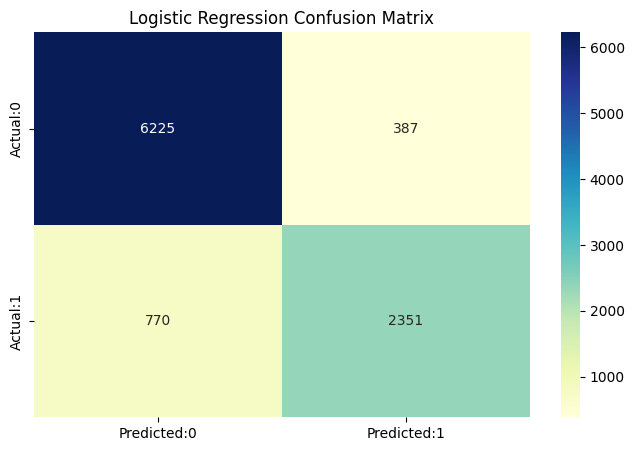

Logistic Regression Accuracy: 0.881126065961163


In [12]:
vectorizer = TfidfVectorizer()
logistic_regression = LogisticRegression(solver="lbfgs")
model_lr = Pipeline([('vectorizer', vectorizer), ('classifier', logistic_regression)])
model_lr.fit(x_train, y_train)

predictions_lr = model_lr.predict(x_test)
cm_lr = confusion_matrix(y_test, predictions_lr)
conf_matrix_lr = pd.DataFrame(data=cm_lr, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Logistic Regression Confusion Matrix')
plt.show()
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, predictions_lr)}")


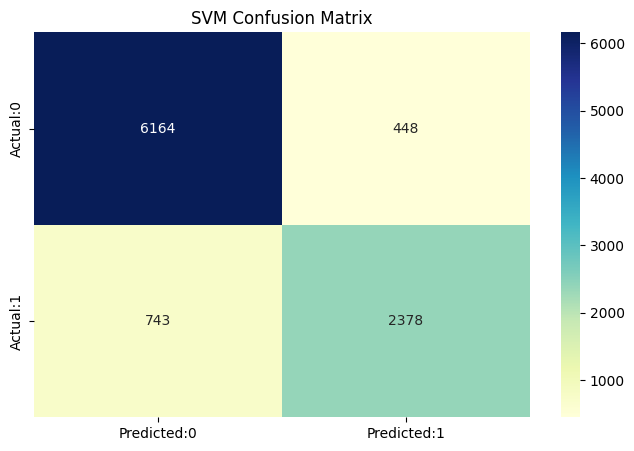

SVM Accuracy: 0.8776327956436865


In [16]:
# SVM
svm_model = SVC(kernel='linear', random_state=100)
model_svm = Pipeline([('vectorizer', vectorizer), ('classifier', svm_model)])
model_svm.fit(x_train, y_train)

# Make predictions and evaluate SVM
predictions_svm = model_svm.predict(x_test)
cm_svm = confusion_matrix(y_test, predictions_svm)
conf_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.title('SVM Confusion Matrix')
plt.show()
print(f"SVM Accuracy: {accuracy_score(y_test, predictions_svm)}")

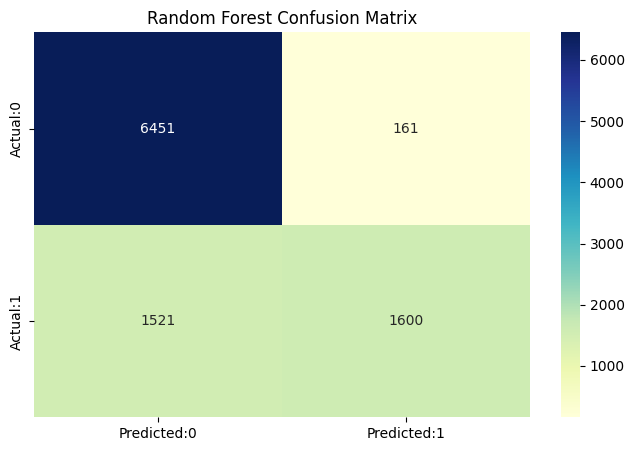

Random Forest Accuracy: 0.8271858625295386


In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=100)
model_rf = Pipeline([('vectorizer', vectorizer), ('classifier', random_forest)])
model_rf.fit(x_train, y_train)

# Make predictions and evaluate Random Forest
predictions_rf = model_rf.predict(x_test)
cm_rf = confusion_matrix(y_test, predictions_rf)
conf_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Random Forest Confusion Matrix')
plt.show()
print(f"Random Forest Accuracy: {accuracy_score(y_test, predictions_rf)}")

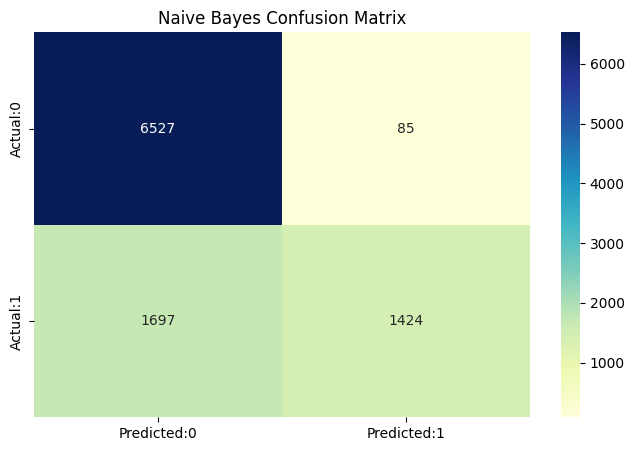

Naive Bayes Accuracy: 0.8169115380663722


In [14]:
# Naive Bayes
naive_bayes = MultinomialNB()
model_nb = Pipeline([('vectorizer', vectorizer), ('classifier', naive_bayes)])
model_nb.fit(x_train, y_train)

# Make predictions and evaluate Naive Bayes
predictions_nb = model_nb.predict(x_test)
cm_nb = confusion_matrix(y_test, predictions_nb)
conf_matrix_nb = pd.DataFrame(data=cm_nb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Naive Bayes Confusion Matrix')
plt.show()
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, predictions_nb)}")